In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
path = 'C:\\Users\\ADMIN\\Desktop\\my project\\House_Price_divar_pyfinance_aliraoofi.csv'
house_data = pd.read_csv(path)
house_data.drop(['Unnamed: 9', 'Unnamed: 8', 'Unnamed: 15', 'Unnamed: 14', 'Unnamed: 13', 'Unnamed: 13', 'Unnamed: 12',
                 'Unnamed: 11', 'Unnamed: 10'], axis=1, inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6868\1560975776.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  house_data = pd.read_csv(path)


In [46]:
for i in ['Warehouse', 'Parking', 'Elevator']:
    for j in range(len(house_data[i])):
        if j == True:
            house_data[i][j] = 1
        else:
            house_data[i][j] = 0
house_data

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,150,1388,3,0,0,0,۲ ساعت پیش در تهران، مرزداران | فروش آپارتمان,۸٬۸۰۰٬۰۰۰٬۰۰۰ تومان
1,54,1389,1,1,1,1,۲ ساعت پیش در تهران، اندیشه | فروش آپارتمان,۸۶۸٬۰۰۰٬۰۰۰ تومان
2,69,1390,2,0,0,0,۲ ساعت پیش در تهران، سلسبیل | فروش آپارتمان,۲٬۱۰۰٬۰۰۰٬۰۰۰ تومان
3,52,1388,1,0,0,0,۲ ساعت پیش در تهران، باغ فیض | فروش آپارتمان,۲٬۸۵۰٬۰۰۰٬۰۰۰ تومان
4,135,1401,3,0,0,0,۲ ساعت پیش در تهران، نیاوران | فروش آپارتمان,۹٬۵۰۰٬۰۰۰٬۰۰۰ تومان
...,...,...,...,...,...,...,...,...
38183,50,1396,1,0,0,0,۶ روز پیش در تهران، اندیشه | فروش آپارتمان,۷۰۰٬۰۰۰٬۰۰۰ تومان
38184,47,1397,1,0,0,0,۳ ساعت پیش در تهران، اندیشه | فروش آپارتمان,۸۰۰٬۰۰۰٬۰۰۰ تومان
38185,190,1399,3,0,0,0,۶ روز پیش در تهران، آجودانیه | فروش آپارتمان,توافقی
38186,48,1383,1,0,0,0,۶ روز پیش در تهران، بریانک | فروش آپارتمان,۱٬۰۸۰٬۰۰۰٬۰۰۰ تومان


In [47]:
def convert_per_to_eng(str_num: str):
    str_c = ''
    a = {'۱': '1', '۲': '2', '۳': '3', '۴': '4', '۵': '5', '۶': '6', '۷': '7', '۸': '8', '۹': '9', '۰': '0'}
    ln_str = len(str_num)
    for i in range(ln_str):
        if str_num[i] in a.keys():
            d = str_num[i]
            d = a[d]
            str_c += d

    return str_c

In [48]:
def substr(primal_str: str, start_pos: int, length: int):
    return primal_str[start_pos:start_pos + length]

In [49]:
def remove_substr_from_primalstr(primal_str: str, sub_str: str):
    assert len(sub_str) < len(primal_str)
    ln_pr = len(primal_str)
    ln_sb = len(sub_str)
    for i in range(0, (ln_pr - ln_sb) + 1):
        #print(substr(primal_str,i,ln_sb))
        if substr(primal_str, i, ln_sb) == sub_str:
            return primal_str[0:i] + primal_str[i + ln_sb:]
    else:
        return primal_str

In [50]:
for i in house_data.index:
    s_n = house_data.Price[i]
    #s_n=remove_substr_from_primalstr(s_n,' تومان')
    if type(s_n) is str:
        s_n = convert_per_to_eng(s_n)
        if s_n.isdecimal():
            s_n = int(s_n)
            house_data.Price[i] = s_n

In [51]:
mask = house_data.Price == 'توافقی'
p = house_data.Price[mask]
house_data.drop(p.index, axis=0, inplace=True)

In [52]:
for i in house_data.index:
    s = house_data.Area[i]
    if s.isdecimal():
        house_data.Area[i] = int(house_data.Area[i])

In [53]:
for i in house_data.index:
    s = house_data.Construction[i]
    if s.isdecimal():
        house_data.Construction[i] = int(house_data.Construction[i])

In [54]:
for i in house_data.index:
    s = house_data.Room[i]
    if s.isdecimal():
        house_data.Room[i] = int(house_data.Room[i])

In [55]:
mask = house_data.Area == 'ali raoofi'
p2 = house_data.Area[mask].index

mask = house_data.Area == 'Area'
p3 = house_data.Area[mask].index

mask = house_data.Area == '@pyfinance'
p4 = house_data.Area[mask].index

l_remove = list(p2) + list(p3) + list(p4)
l_remove = set(l_remove)
l_remove = list(l_remove)
house_data.drop(l_remove, axis=0, inplace=True)

In [56]:
mask = house_data.Address == 'ali raoofi'
l1 = house_data.Address[mask].index
house_data.drop(l1, axis=0, inplace=True)

In [57]:
house_data.Address[0]

'۲ ساعت پیش در تهران، مرزداران | فروش آپارتمان'

In [58]:
remove_substr_from_primalstr(house_data.Address[0], '،')

'۲ ساعت پیش در تهران مرزداران | فروش آپارتمان'

In [59]:
for i in house_data.index:
    #print(i)
    #a= ' | فروش آپارتمان'
    #b='پیش در تهران'
    if len(house_data.Address[i]) > len(' | فروش آپارتمان'):
        s1 = house_data.Address[i]
        #print(s1)
        s1 = remove_substr_from_primalstr(s1, ' | فروش آپارتمان')
        s1 = remove_substr_from_primalstr(s1, 'پیش در تهران')
        if 'ساعت' in s1:
            s1 = remove_substr_from_primalstr(s1, 'ساعت')
        elif 'روز' in s1:
            s1 = remove_substr_from_primalstr(s1, 'روز')
        for j in range(31):
            a = convert_per_to_eng(s1[0:2])
            if a.isdecimal():
                a = int(a)
                if a == j:
                    s1 = remove_substr_from_primalstr(s1, s1[0:2])
        s1 = remove_substr_from_primalstr(s1, '،')
        #s1 = s1.replace(' ', '')
        #s1=remove_substr_from_primalstr(s1,' ')
        house_data.Address[i] = s1.strip()

In [60]:
house_data

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,150,1388,3,0,0,0,مرزداران,8800000000
1,54,1389,1,1,1,1,اندیشه,868000000
2,69,1390,2,0,0,0,سلسبیل,2100000000
3,52,1388,1,0,0,0,باغ فیض,2850000000
4,135,1401,3,0,0,0,نیاوران,9500000000
...,...,...,...,...,...,...,...,...
38180,51,1390,1,0,0,0,اندیشه,1050000000
38181,100,1392,2,0,0,0,آذری,2700000000
38183,50,1396,1,0,0,0,اندیشه,700000000
38184,47,1397,1,0,0,0,اندیشه,800000000


In [61]:
c = pd.value_counts(house_data.Address)
c

اندیشه                                            2409
پونک                                              1442
سعادت‌آباد                                        1239
کوی فردوس                                         1052
جیحون                                              730
                                                  ... 
شهرک پاسداران، خیابان نفت جنوبی (بلوار شاهد)         1
تهرانپارس شرقی، خیابان زفرقندی (بزرگراه باقری)       1
امام حسین(ع)، کوچه مرتجایی (کنارگذر امام علی)        1
صادقیه، خیابان صادقی پور (خیابان ستارخان)            1
زعفرانیه، بلوار نلسون ماندلا (جردن)                  1
Name: Address, Length: 1250, dtype: int64

In [62]:
house_data['Count_add_hor'] = 0

In [63]:
for i in house_data.index:
    house_data.Count_add_hor[i] = c[house_data.Address[i]]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6868\1528631121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data.Count_add_hor[i] = c[house_data.Address[i]]


In [64]:
house_data

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price,Count_add_hor
0,150,1388,3,0,0,0,مرزداران,8800000000,413
1,54,1389,1,1,1,1,اندیشه,868000000,2409
2,69,1390,2,0,0,0,سلسبیل,2100000000,399
3,52,1388,1,0,0,0,باغ فیض,2850000000,259
4,135,1401,3,0,0,0,نیاوران,9500000000,604
...,...,...,...,...,...,...,...,...,...
38180,51,1390,1,0,0,0,اندیشه,1050000000,2409
38181,100,1392,2,0,0,0,آذری,2700000000,39
38183,50,1396,1,0,0,0,اندیشه,700000000,2409
38184,47,1397,1,0,0,0,اندیشه,800000000,2409


In [65]:
mask = house_data.Count_add_hor < 10
p_ind = house_data.Count_add_hor[mask].index
house_data2 = house_data.drop(p_ind, axis=0)
house_data2

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price,Count_add_hor
0,150,1388,3,0,0,0,مرزداران,8800000000,413
1,54,1389,1,1,1,1,اندیشه,868000000,2409
2,69,1390,2,0,0,0,سلسبیل,2100000000,399
3,52,1388,1,0,0,0,باغ فیض,2850000000,259
4,135,1401,3,0,0,0,نیاوران,9500000000,604
...,...,...,...,...,...,...,...,...,...
38180,51,1390,1,0,0,0,اندیشه,1050000000,2409
38181,100,1392,2,0,0,0,آذری,2700000000,39
38183,50,1396,1,0,0,0,اندیشه,700000000,2409
38184,47,1397,1,0,0,0,اندیشه,800000000,2409


In [66]:
type(house_data.Price[0])

int

In [67]:
len(house_data.index)

29848

In [68]:
len(house_data2.index)

28146

In [69]:
count_addres = house_data.Count_add_hor

In [70]:
count_addres

0         413
1        2409
2         399
3         259
4         604
         ... 
38180    2409
38181      39
38183    2409
38184    2409
38186     324
Name: Count_add_hor, Length: 29848, dtype: int64

In [71]:
house_data.drop(['Count_add_hor'], axis=1, inplace=True)

In [72]:
house_data

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
0,150,1388,3,0,0,0,مرزداران,8800000000
1,54,1389,1,1,1,1,اندیشه,868000000
2,69,1390,2,0,0,0,سلسبیل,2100000000
3,52,1388,1,0,0,0,باغ فیض,2850000000
4,135,1401,3,0,0,0,نیاوران,9500000000
...,...,...,...,...,...,...,...,...
38180,51,1390,1,0,0,0,اندیشه,1050000000
38181,100,1392,2,0,0,0,آذری,2700000000
38183,50,1396,1,0,0,0,اندیشه,700000000
38184,47,1397,1,0,0,0,اندیشه,800000000


In [73]:
gr_h = house_data.groupby(['Address'])

In [74]:
gr_avg = gr_h.mean()
gr_avg

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6868\186651539.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  gr_avg = gr_h.mean()


,Warehouse,Parking,Elevator,Price
Address,,,,
آبشار,0.0,0.0,0.0,2.007203e+09
آبشار تهران,0.0,0.0,0.0,3.001289e+09
آبشار تهران، بلوار اردستانی (بزرگراه خرازی),0.0,0.0,0.0,1.216000e+09
آبشار تهران، خیابان سازمان آب (خ. هنگام),0.0,0.0,0.0,1.000000e+09
آبشار تهران، خیابان پیست دوچرخه سواری دریاچه چیتگر,0.0,0.0,0.0,4.800000e+09
...,...,...,...,...
یک ربع پونک,0.0,0.0,0.0,2.830000e+09
یک ربع پیی,0.0,0.0,0.0,5.250000e+09
یک ربع چیتگر,0.0,0.0,0.0,1.812000e+09


In [75]:
gr_avg.drop(['Warehouse', 'Parking', 'Elevator'], axis=1, inplace=True)

In [76]:
gr_avg

,Price
Address,
آبشار,2.007203e+09
آبشار تهران,3.001289e+09
آبشار تهران، بلوار اردستانی (بزرگراه خرازی),1.216000e+09
آبشار تهران، خیابان سازمان آب (خ. هنگام),1.000000e+09
آبشار تهران، خیابان پیست دوچرخه سواری دریاچه چیتگر,4.800000e+09
...,...
یک ربع پونک,2.830000e+09
یک ربع پیی,5.250000e+09
یک ربع چیتگر,1.812000e+09


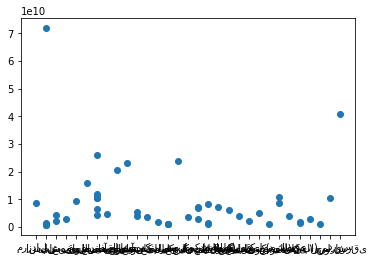

In [77]:
plt.scatter(house_data.Address[:50], house_data.Price[:50])

In [78]:
house_data.to_csv('C:\\Users\\ADMIN\\Desktop\\my project\\tehran_house_preprocessing.csv', index=False)

In [79]:
mask = house_data.Address == 'اندیشه'
ad_ind = house_data.Address[mask].index
ad_ind

Int64Index([    1,    19,    49,    58,    69,   110,   127,   146,   170,
              188,
            ...
            38156, 38158, 38163, 38168, 38169, 38171, 38175, 38180, 38183,
            38184],
           dtype='int64', length=2409)

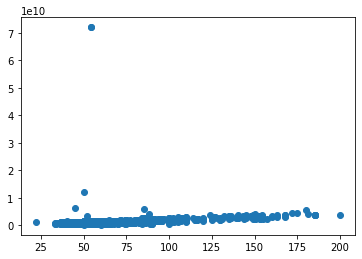

In [80]:
plt.scatter(house_data.Area[ad_ind], house_data.Price[ad_ind])

{'whiskers': [<matplotlib.lines.Line2D at 0x28b195c25c0>,
 'caps': [<matplotlib.lines.Line2D at 0x28b195c2b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b195c22f0>],
 'medians': [<matplotlib.lines.Line2D at 0x28b195c3100>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b195c33d0>],
 'means': []}

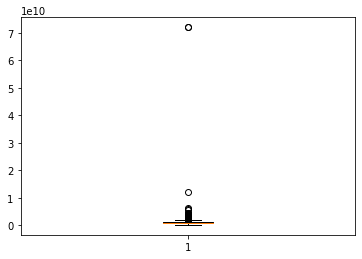

In [81]:
plt.boxplot(house_data.Price[ad_ind])

In [127]:
y = house_data.Price[ad_ind].copy()
y.quantile(0.75)

1250000000.0

In [128]:
max_ind = y[y > y.quantile(0.75)].index
max_ind

Int64Index([   19,    58,   146,   188,   268,   327,   350,   389,   459,
              487,
            ...
            37773, 37851, 37951, 37987, 38040, 38062, 38076, 38080, 38095,
            38146],
           dtype='int64', length=577)

In [129]:
x = house_data.Area[ad_ind].copy()

In [130]:
x

1        54
19       65
49       55
58       54
69       41
         ..
38171    60
38175    56
38180    51
38183    50
38184    47
Name: Area, Length: 2409, dtype: object

In [131]:
y

1          868000000
19        1495000000
49         570000000
58       72000000000
69         490000000
            ...     
38171      939000000
38175      764000000
38180     1050000000
38183      700000000
38184      800000000
Name: Price, Length: 2409, dtype: object

In [132]:
x.drop(max_ind, inplace=True)
x

1        54
49       55
69       41
110      60
127      54
         ..
38171    60
38175    56
38180    51
38183    50
38184    47
Name: Area, Length: 1832, dtype: object

In [133]:
y.drop(max_ind, inplace=True)
y

1         868000000
49        570000000
69        490000000
110       800000000
127       868000000
            ...    
38171     939000000
38175     764000000
38180    1050000000
38183     700000000
38184     800000000
Name: Price, Length: 1832, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x28b21999ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x28b2199a470>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b21999d20>],
 'medians': [<matplotlib.lines.Line2D at 0x28b2199aa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b2199ace0>],
 'means': []}

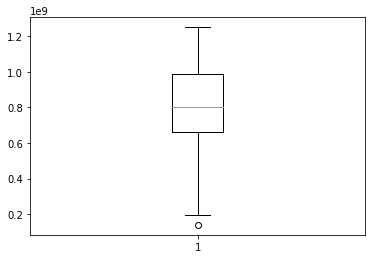

In [134]:
plt.boxplot(y)

In [135]:
min_ind = y[y < y.quantile(0.25)].index
y.drop(min_ind,inplace=True)
x.drop(min_ind,inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x28b219eb790>,
 'caps': [<matplotlib.lines.Line2D at 0x28b219ebd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b219eb4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x28b21a18310>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b21a185e0>],
 'means': []}

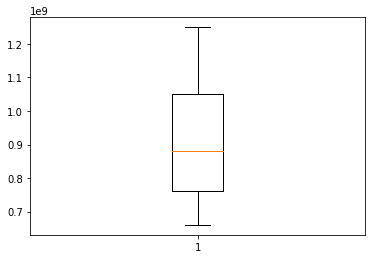

In [136]:
plt.boxplot(y)

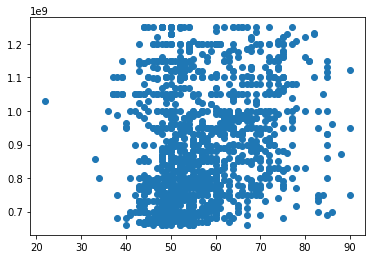

In [137]:
plt.scatter(x,y)

In [142]:
data_hor1=house_data.loc[ad_ind][:].copy()
data_hor1

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
1,54,1389,1,1,1,1,اندیشه,868000000
19,65,1389,2,0,0,0,اندیشه,1495000000
49,55,1390,2,0,0,0,اندیشه,570000000
58,54,1394,1,0,0,0,اندیشه,72000000000
69,41,1396,1,0,0,0,اندیشه,490000000
...,...,...,...,...,...,...,...,...
38171,60,1396,1,0,0,0,اندیشه,939000000
38175,56,1394,1,0,0,0,اندیشه,764000000
38180,51,1390,1,0,0,0,اندیشه,1050000000
38183,50,1396,1,0,0,0,اندیشه,700000000


In [144]:
hor_ind=data_hor1[data_hor1.Area >85].index
hor_ind

Int64Index([  268,   327,   350,   911,  1016,  1262,  1508,  1552,  1808,
             2801,
            ...
            37591, 37620, 37654, 37659, 37702, 37773, 38040, 38062, 38095,
            38146],
           dtype='int64', length=224)

In [146]:
data_g85=data_hor1.loc[hor_ind][:]
data_g85

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
268,130,1401,3,0,0,0,اندیشه,1780000000
327,124,1401,2,0,0,0,اندیشه,3600000000
350,160,1401,3,0,0,0,اندیشه,2880000000
911,103,1390,2,0,0,0,اندیشه,1280000000
1016,94,1400,2,0,0,0,اندیشه,2256000000
...,...,...,...,...,...,...,...,...
37773,110,1398,2,0,0,0,اندیشه,1325000000
38040,110,1401,2,0,0,0,اندیشه,1700000000
38062,152,1399,3,0,0,0,اندیشه,3400000000
38095,125,1401,3,0,0,0,اندیشه,2000000000


In [147]:
data_g85[data_g85.Price<=1000000000].index

Int64Index([4758, 4899, 5803, 5813, 17314, 21118, 21675, 35894, 37211], dtype='int64')

In [158]:
data_g85.loc[data_g85[data_g85.Price<=1000000000].index][:]

,Area,Construction,Room,Warehouse,Parking,Elevator,Address,Price
4758,86,1395,2,0,0,0,اندیشه,700000000
4899,90,1400,2,0,0,0,اندیشه,320000000
5803,89,1401,2,0,0,0,اندیشه,370000000
5813,90,1396,2,0,0,0,اندیشه,580000000
17314,100,1401,2,0,0,0,اندیشه,370000000
21118,86,1388,2,0,0,0,اندیشه,960000000
21675,88,1388,2,0,0,0,اندیشه,872800000
35894,90,1384,2,0,0,0,اندیشه,950000000
37211,90,1385,2,0,0,0,اندیشه,750000000


In [168]:
data_hor1.Price[37211]/1000000000

0.75

([<matplotlib.axis.XTick at 0x28b23a783d0>,
 [Text(0, 0, 'آبشار'),
  Text(1, 0, 'آبشار تهران'),
  Text(2, 0, 'آبشار تهران، بلوار اردستانی (بزرگراه خرازی)'),
  Text(3, 0, 'آبشار تهران، خیابان سازمان آب (خ. هنگام)'),
  Text(4, 0, 'آبشار تهران، خیابان پیست دوچرخه سواری دریاچه چیتگر')])

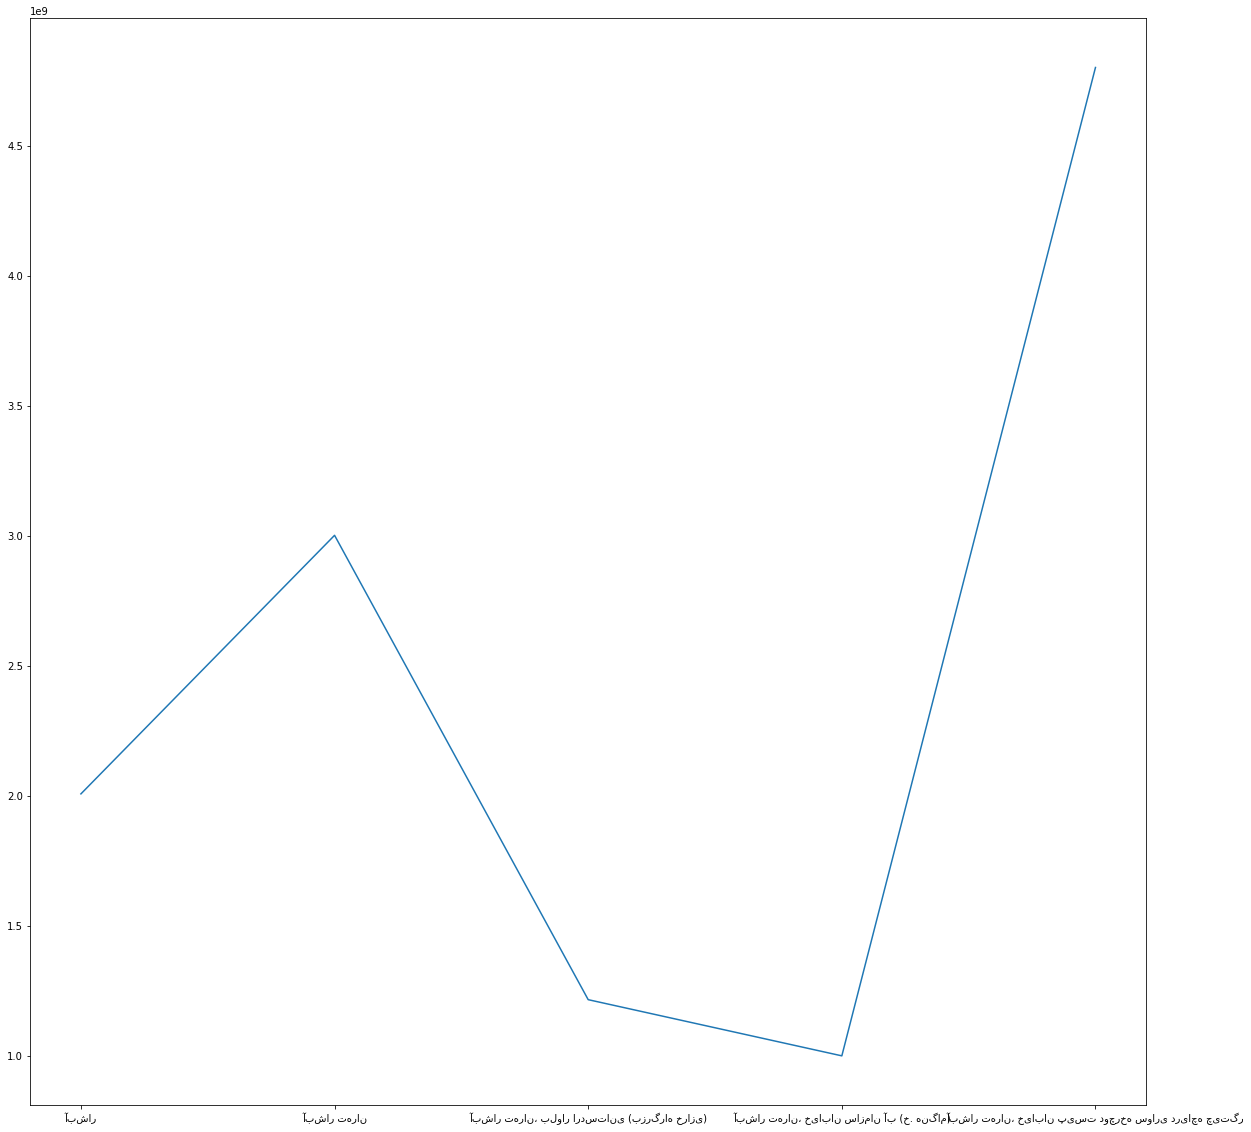

In [172]:
plt.figure(figsize=(20,20))
plt.plot(gr_avg[:5])
plt.xticks(range(5),gr_avg.index[:5])

1030000000

1.03